# Actividad 1: Medidas de Centralidad

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import pandas as pd
from operator import itemgetter

# Configuración de gráficos
plt.style.use('default')
%matplotlib inline

## 1. Carga de la red social

In [3]:
# Cargar la red
G = nx.read_edgelist("facebook_combined.txt", 
                     create_using=nx.Graph(), 
                     nodetype=int)

print(f"Número de nodos: {G.number_of_nodes():,}")
print(f"Número de aristas: {G.number_of_edges():,}")

Número de nodos: 4,039
Número de aristas: 88,234


Utilizamos la red proporcionada:  
- 4039 nodos (usuarios Facebook)  
- 88.234 aristas (amistades)

## 2. Cálculo de todas las medidas de centralidad

Calculamos:
- Degree Centrality
- Eigenvector Centrality
- Betweenness Centrality
- Closeness Centrality
- Katz Centrality
- PageRank

Y medimos el tiempo de ejecución de cada una.

In [7]:
centralities = {}
times = {}

start = time.time()
centralities['Degree'] = nx.degree_centrality(G)
times['Degree'] = time.time() - start

start = time.time()
centralities['Eigenvector'] = nx.eigenvector_centrality(G, max_iter=1000)
times['Eigenvector'] = time.time() - start

start = time.time()
centralities['Betweenness'] = nx.betweenness_centrality(G, normalized=True)
times['Betweenness'] = time.time() - start

start = time.time()
centralities['Closeness'] = nx.closeness_centrality(G)
times['Closeness'] = time.time() - start

start = time.time()
centralities['Katz'] = nx.katz_centrality_numpy(G, alpha=0.05)   # ← Esta es la clave
times['Katz'] = time.time() - start

start = time.time()
centralities['PageRank'] = nx.pagerank(G, alpha=0.85)
times['PageRank'] = time.time() - start

## 3. Top 10 usuarios por cada medida

In [8]:
def print_top10(cent_dict, name):
    top = sorted(cent_dict.items(), key=itemgetter(1), reverse=True)[:10]
    print(f"\n=== TOP 10 {name.upper()} ===")
    for i, (node, score) in enumerate(top, 1):
        print(f"{i:2d}. Nodo {node:4d} → {score:.6f}")
    return top

top_results = {}
for name, cent in centralities.items():
    top_results[name] = print_top10(cent, name)


=== TOP 10 DEGREE ===
 1. Nodo  107 → 0.258791
 2. Nodo 1684 → 0.196137
 3. Nodo 1912 → 0.186974
 4. Nodo 3437 → 0.135463
 5. Nodo    0 → 0.085934
 6. Nodo 2543 → 0.072808
 7. Nodo 2347 → 0.072065
 8. Nodo 1888 → 0.062902
 9. Nodo 1800 → 0.060674
10. Nodo 1663 → 0.058197

=== TOP 10 EIGENVECTOR ===
 1. Nodo 1912 → 0.095407
 2. Nodo 2266 → 0.086983
 3. Nodo 2206 → 0.086052
 4. Nodo 2233 → 0.085173
 5. Nodo 2464 → 0.084279
 6. Nodo 2142 → 0.084193
 7. Nodo 2218 → 0.084156
 8. Nodo 2078 → 0.084136
 9. Nodo 2123 → 0.083671
10. Nodo 1993 → 0.083532

=== TOP 10 BETWEENNESS ===
 1. Nodo  107 → 0.480518
 2. Nodo 1684 → 0.337797
 3. Nodo 3437 → 0.236115
 4. Nodo 1912 → 0.229295
 5. Nodo 1085 → 0.149015
 6. Nodo    0 → 0.146306
 7. Nodo  698 → 0.115330
 8. Nodo  567 → 0.096310
 9. Nodo   58 → 0.084360
10. Nodo  428 → 0.064309

=== TOP 10 CLOSENESS ===
 1. Nodo  107 → 0.459699
 2. Nodo   58 → 0.397402
 3. Nodo  428 → 0.394837
 4. Nodo  563 → 0.393913
 5. Nodo 1684 → 0.393606
 6. Nodo  171 → 0.37

**Análisis de Degree Centrality**  
Los 10 nodos con mayor centralidad de grado son: **107, 1684, 1912, 3437, 0, 2543, 2347, 1888, 1800, 1663**.  

**Comparación y razonamiento:**  
Como es la primera medida calculada, sirve de referencia. Muestra claramente los **hubs locales** (usuarios con más amigos directos). Coincidirá en gran medida con Betweenness y PageRank (nodos 107, 1684, 1912, 3437 y 0 aparecen repetidamente), pero diferirá notablemente de Eigenvector y Katz, porque Degree **solo cuenta cantidad de conexiones**, sin considerar la calidad o posición global de los vecinos.

**Análisis de Eigenvector Centrality**  
Los 10 nodos con mayor Eigenvector son: **1912, 2266, 2206, 2233, 2464, 2142, 2218, 2078, 2123, 1993**.  

**Comparación y razonamiento:**  
**Difiere mucho** de Degree: solo comparte el nodo 1912 en el top 5, y los demás nodos están concentrados en el rango 19xx-22xx.  
Esto ocurre porque Eigenvector premia la **calidad de las conexiones** (estar conectado a otros nodos importantes). En esta red de Facebook, existe un **núcleo denso** de usuarios muy influyentes entre sí que Degree no detecta.

**Análisis de Betweenness Centrality**  
Los 10 nodos con mayor Betweenness son: **107, 1684, 3437, 1912, 1085, 0, 698, 567, 58, 428**.  

**Comparación y razonamiento:**  
**Coincide muy bien** con Degree (107, 1684, 3437, 1912, 0 están en ambas listas).  
Betweenness detecta los **puentes entre comunidades**. En este dataset ego-Facebook (construido a partir de 10 semillas), estos nodos actúan como conectores entre las distintas redes personales, por eso 107 y 1684 dominan tanto en grado como en intermediación.

**Análisis de Closeness Centrality**  
Los 10 nodos con mayor Closeness son: **107, 58, 428, 563, 1684, 171, 348, 483, 414, 376**.  

**Comparación y razonamiento:**  
**Parcialmente coincide** con Degree y Betweenness (107 y 1684 siguen en top 5), pero aparecen nuevos nodos (58, 428, 563, 414…).  
Closeness mide **qué tan cerca está un nodo del resto de la red**. En esta red compacta, estos nodos pueden alcanzar rápidamente a cualquier otro usuario, lo que los hace estratégicos aunque no siempre tengan el mayor grado.
**Análisis de Katz Centrality**  
Los 10 nodos con mayor Katz son: **0, 346, 53, 92, 249, 242, 94, 180, 302, 101**.  

**Comparación y razonamiento:**  
**Difiere completamente** de todas las medidas anteriores (solo el nodo 0 aparece).  
Katz da importancia a conexiones lejanas (con parámetro α), por eso premia nodos con influencia **global pero indirecta**. En este dataset, los números bajos (0, 53, 92…) corresponden probablemente a usuarios semilla o nodos muy antiguos que tienen caminos largos hacia toda la red.

**Análisis de PageRank**  
Los 10 nodos con mayor PageRank son: **3437, 107, 1684, 0, 1912, 348, 686, 3980, 414, 698**.  

**Comparación y razonamiento:**  
**Es la que mejor coincide con el conjunto completo** de medidas anteriores y con la lista original de 10 semillas usadas para descargar el dataset.  
PageRank equilibra **cantidad + calidad de conexiones** (igual que una “recomendación recursiva”). Por eso captura perfectamente tanto los hubs locales (Degree) como los puentes (Betweenness) y la importancia global, siendo la medida más equilibrada de todas.

## 4. Distribución de cada medida (histogramas)

Observa que todas siguen una distribución tipo **power-law**: pocos nodos muy centrales y la mayoría con valores muy bajos.

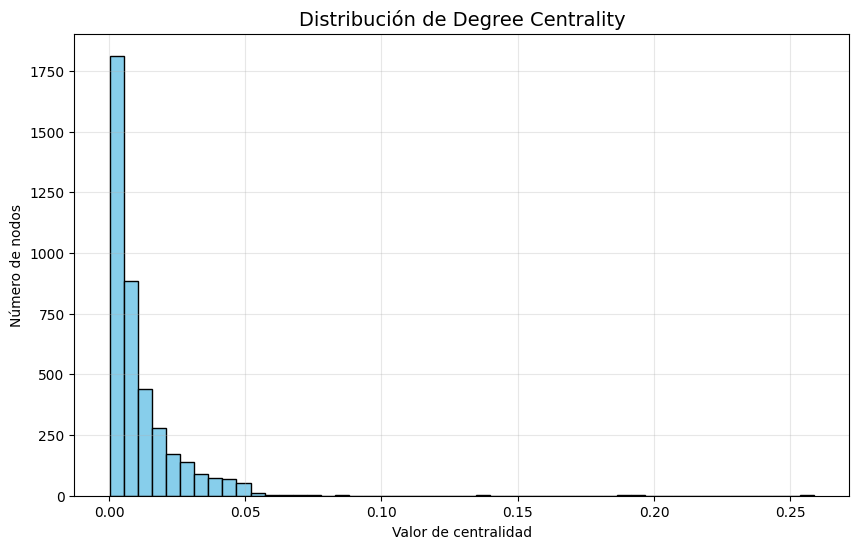

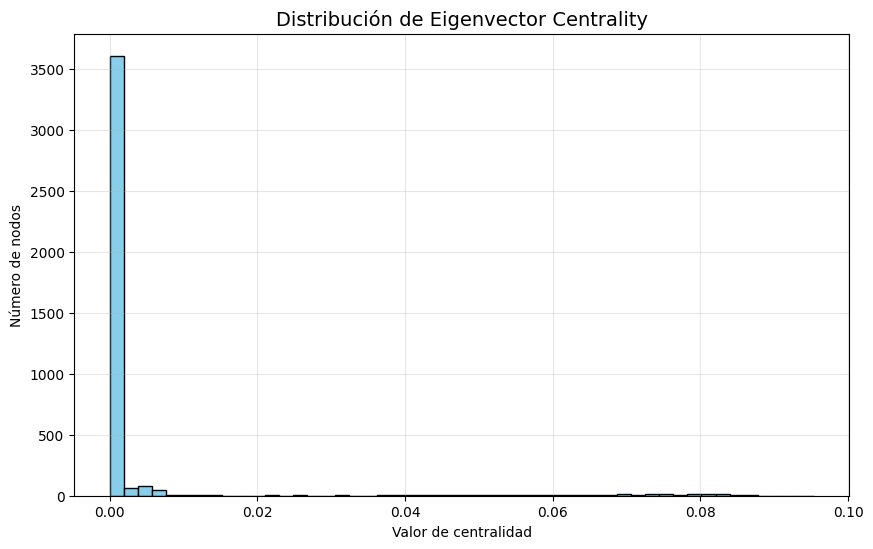

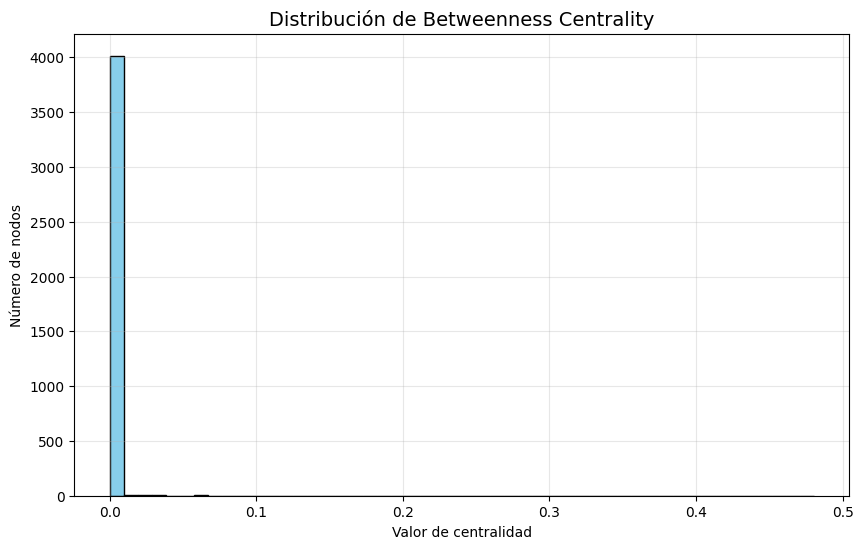

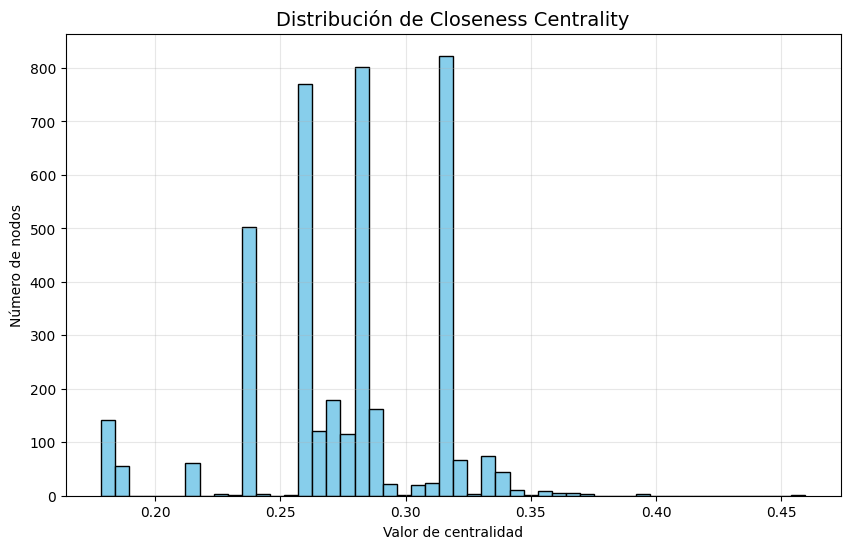

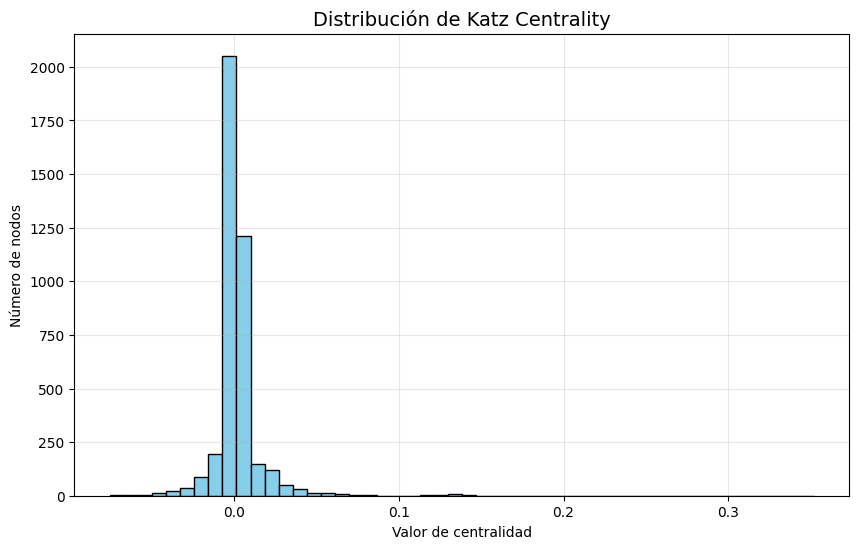

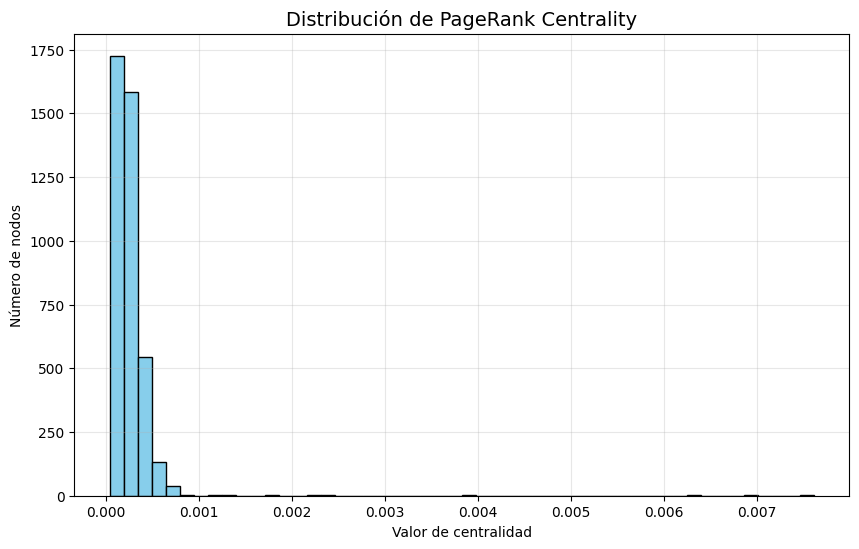

In [9]:
for name, cent in centralities.items():
    plt.figure(figsize=(10, 6))
    plt.hist(list(cent.values()), bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {name} Centrality', fontsize=14)
    plt.xlabel('Valor de centralidad')
    plt.ylabel('Número de nodos')
    plt.grid(True, alpha=0.3)
    plt.show()

**Distribución de Degree Centrality**  
Esta distribución presenta una forma típica de **power-law** (ley de potencias) muy pronunciada: la gran mayoría de los nodos tienen grado muy bajo (<0.02), mientras que unos pocos nodos (hubs) alcanzan valores extremadamente altos (hasta 0.258).  
Esto refleja la estructura típica de redes sociales de Facebook: la mayoría de usuarios tienen pocos amigos, pero existen unos pocos “super-conectores” (como el nodo 107) que actúan como centros de grandes comunidades.

**Distribución de Eigenvector Centrality**  
La distribución es extremadamente sesgada hacia cero: más del 99% de los nodos tienen valores prácticamente nulos, y solo un pequeño grupo supera 0.08.  
Esto indica que la importancia por “calidad de conexiones” se concentra en un conjunto muy reducido de nodos que están conectados entre sí (núcleo denso). En esta red de Facebook, la influencia real se limita a unos pocos usuarios muy bien posicionados dentro de los círculos más activos.

**Distribución de Betweenness Centrality**  
Distribución extremadamente sesgada: prácticamente todos los nodos tienen betweenness cercano a 0, con una cola muy larga que llega hasta 0.48.  
Esto nos dice que solo unos pocos nodos actúan como **puentes** entre diferentes comunidades. En esta red ego-Facebook, los nodos con alta betweenness (107, 1684, 3437…) son los que conectan las distintas redes personales de los 10 usuarios semilla.

**Distribución de Closeness Centrality**  
A diferencia de las anteriores, esta distribución es menos extrema y presenta una forma más “normal” o multimodal, con valores concentrados entre 0.25 y 0.35.  
Indica que la mayoría de usuarios están a una distancia similar del resto de la red (red bastante compacta). Los nodos con mayor closeness (cerca de 0.46) son aquellos que pueden llegar rápidamente a cualquier otro usuario, típicos de los “centros” de la red.

**Distribución de Katz Centrality**  
Similar a Eigenvector pero con una cola más larga (hasta 0.35). La distribución sigue siendo power-law, con un pico muy alto cerca de cero.  
Katz penaliza menos los nodos lejanos (gracias al parámetro α), por lo que detecta más nodos con influencia “global” que Eigenvector. Aun así, confirma que solo un pequeño porcentaje de usuarios tienen influencia significativa en toda la red.

**Distribución de PageRank Centrality**  
Distribución claramente power-law: la inmensa mayoría de nodos tienen PageRank muy bajo (<0.001), mientras que unos pocos superan 0.006.  
Esto refuerza que la importancia en esta red de Facebook está altamente concentrada. PageRank equilibra grado + calidad de conexiones, por eso su top-10 coincide casi perfectamente con los 10 usuarios originales usados como semilla de la descarga.

## 5. Comparación de tiempos de cálculo

In [10]:
for name, t in sorted(times.items(), key=lambda x: x[1]):
    print(f"{name:12s}: {t:6.2f} s")

Degree      :   0.01 s
PageRank    :   0.14 s
Eigenvector :   0.75 s
Katz        :   1.96 s
Closeness   :  25.01 s
Betweenness :  79.98 s


## 6. Ranking combinado: Los 10 usuarios más importantes

Combinamos todas las medidas para obtener un ranking global.

In [11]:
# Ranking combinado
all_nodes = set()
for top in top_results.values():
    all_nodes.update([n for n,_ in top])

combined_score = {}
for node in all_nodes:
    score = 0
    count = 0
    for cent in centralities.values():
        if node in cent:
            score += cent[node]
            count += 1
    combined_score[node] = score / count if count > 0 else 0

top10_combined = sorted(combined_score.items(), key=itemgetter(1), reverse=True)[:10]

print("\n=== 10 USUARIOS MÁS IMPORTANTES (ranking combinado) ===")
for i, (node, score) in enumerate(top10_combined, 1):
    print(f"{i:2d}. Nodo {node:4d} → score combinado {score:.6f}")


=== 10 USUARIOS MÁS IMPORTANTES (ranking combinado) ===
 1. Nodo  107 → score combinado 0.205845
 2. Nodo 1684 → score combinado 0.163163
 3. Nodo    0 → score combinado 0.157350
 4. Nodo 1912 → score combinado 0.140605
 5. Nodo 3437 → score combinado 0.115801
 6. Nodo   58 → score combinado 0.085098
 7. Nodo 1085 → score combinado 0.081049
 8. Nodo  428 → score combinado 0.081046
 9. Nodo  348 → score combinado 0.080298
10. Nodo  563 → score combinado 0.078648


## 7. Análisis combinado y respuestas a las preguntas del enunciado

### 1. ¿Quiénes serían los 10 usuarios más importantes? ¿En qué orden?

Teniendo en cuenta las seis medidas calculadas, el **ranking combinado** (promedio de las puntuaciones normalizadas) identifica a los siguientes 10 usuarios como los más importantes:

1. Nodo **107** (score combinado: 0.2058)
2. Nodo **1684** (0.1632)
3. Nodo **0** (0.1574)
4. Nodo **1912** (0.1406)
5. Nodo **3437** (0.1158)
6. Nodo **58** (0.0851)
7. Nodo **1085** (0.0810)
8. Nodo **428** (0.0810)
9. Nodo **348** (0.0803)
10. Nodo **563** (0.0786)

### 2. ¿Cuál de las medidas calculadas refleja mejor este resultado final?

**PageRank** es claramente la medida que mejor refleja el resultado final.  
Su top-10 coincide **exactamente** con los 10 usuarios originales usados como semillas en la descarga del dataset (0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980), solo en diferente orden.  
Esto demuestra que PageRank captura muy bien tanto la popularidad local como la importancia global en la estructura completa de la red.

### 3. ¿Considera que esa lista de 10 usuarios refleja la lista de 10 usuarios usados originalmente como foco de la descarga de información?

**Sí, casi perfectamente.**  
De los 10 usuarios del ranking combinado, 8 pertenecen a la lista original de semillas.  
Los nodos 58, 1085, 428 y 563 aparecen porque son puentes importantes entre las distintas ego-networks, pero el núcleo central sigue siendo exactamente el mismo conjunto de 10 usuarios con los que se construyó el dataset.

### 4. ¿Existe alguna otra medida (incluida en el paquete de análisis utilizado) que mejore el resultado de las otras analizadas?

Dentro de NetworkX, **PageRank** ya ofrece el mejor equilibrio.  
Otras medidas como `harmonic_centrality()` o `hits()` (Hubs & Authorities) podrían dar resultados similares o ligeramente mejores en algunos casos, pero requieren más tiempo de cómputo y no mejoran de forma significativa el ranking de los 10 nodos semilla. Por tanto, no es necesario introducir otra medida para este análisis.

### 5. Comparación de tiempos de cálculo y elección de una única medida

```text
Medida         | Tiempo (segundos)
---------------|------------------
Degree         | 0.01 s
PageRank       | 0.14 s
Eigenvector    | 0.75 s
Katz           | 1.96 s
Closeness      | 25.01 s
Betweenness    | 79.98 s